# Model 1

*Author: Liam Ling*

OpenFace feature extraction is done in Google Colab.

Link to the Colab notebook: [Click here](https://colab.research.google.com/drive/1EVXGv7-Fd1QOEvSTtXCIvszrPXx1L4u4?usp=sharing)

Datasets are in Google Drive: [Click here](https://drive.google.com/drive/folders/1cryZ_pzgiwqeNCOoRfbieRLCpivMktjG?usp=sharing)

To restore the datasets in place:
- for FePh: download the Feph/processed and FePh/FePh_labels.csv into ../datasets folder
- for IMPA-FACES3D: download the facesdb/process into ../datasets folder

## IMPA-FACES3D: 3D facial expression database
Ref: http://app.visgraf.impa.br/database/faces/about/

### Find and Load All the Data Files

In [1]:
import glob

In [2]:
facesdb_processed = glob.glob("../datasets/facesdb/processed/*.csv")
len(facesdb_processed)

252

### Preprocessing

In [3]:
# this is from the dataset webpage
emotion_mapping = {
    "00": "neutral frontal",
    "01": "joy",
    "02": "sadness",
    "03": "surprise",
    "04": "anger",
    "05": "disgust",
    "06": "fear"
}

In [4]:
from pathlib import Path

In [5]:
Path(facesdb_processed[0]).stem.split("-")[1].split("_")[0]

'01'

In [6]:
import pandas as pd

In [7]:
facesdb_labels_df = pd.DataFrame(
    {
        "file":[f"{Path(f).stem}.bmp" for f in facesdb_processed],
        "emotion":[emotion_mapping.get(Path(f).stem.split("-")[1].split("_")[0]) for f in facesdb_processed]
    }
)
facesdb_labels_df

,file,emotion
0,s013-01_img.bmp,joy
1,s002-04_img.bmp,anger
2,s006-04_img.bmp,anger
3,s009-02_img.bmp,sadness
4,s003-04_img.bmp,anger
...,...,...
247,s016-03_img.bmp,surprise
248,s009-01_img.bmp,joy
249,s028-01_img.bmp,joy
250,s038-04_img.bmp,anger


In [8]:
processed_list = []
for f in facesdb_processed:
    processed_list.append(pd.read_csv(f, sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True))

In [9]:
facesdb_all_processed = pd.concat(processed_list)
facesdb_all_processed

,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0,0.975,0.009320,0.014206,-0.999856,-0.072808,0.043095,-0.996414,-0.032,0.029,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
0,0,0.975,0.109476,0.025355,-0.993666,-0.035418,0.060245,-0.997555,0.037,0.043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0.975,0.032634,0.132334,-0.990668,-0.094885,0.160115,-0.982527,-0.032,0.147,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
0,0,0.975,0.075904,-0.173915,-0.981831,-0.124586,-0.169520,-0.977620,-0.025,-0.174,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,0,0.925,0.091588,0.028566,-0.995387,-0.139688,0.040677,-0.989360,-0.024,0.035,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0.975,0.109363,0.084499,-0.990404,-0.100253,0.135343,-0.985714,0.005,0.111,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
0,0,0.975,0.030801,-0.172334,-0.984557,-0.061300,-0.131552,-0.989412,-0.015,-0.153,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
0,0,0.975,0.069323,-0.085740,-0.993903,-0.118764,-0.059494,-0.991139,-0.025,-0.073,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
0,0,0.975,0.092728,-0.067415,-0.993407,-0.158522,-0.046738,-0.986249,-0.033,-0.058,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
facesdb_all_processed["file"] = [f"{Path(f).stem}.bmp" for f in facesdb_processed]

In [11]:
facesdb_all_processed = facesdb_all_processed.reset_index().drop(["index","face"], axis=1)

In [12]:
def filter_low_confidence(df, level=0.0):
    return df[df["confidence"] >= level]
facesdb_all_processed_filtered = filter_low_confidence(facesdb_all_processed, level=0.5)
# after filtering out records have confidence level lower than 0.5
print(facesdb_all_processed_filtered.shape)

(252, 711)


In [13]:
facesdb_all_processed_features = facesdb_all_processed_filtered[['confidence', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r',
       'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r',
       'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r',
       'AU45_r', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c',
       'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c',
       'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c',
       'AU45_c', 'file']]

In [14]:
facesdb_featrues_labels = facesdb_all_processed_features.merge(facesdb_labels_df, on="file")
facesdb_featrues_labels

,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,...,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,file,emotion
0,0.975,0.26,0.95,0.07,0.22,1.10,0.80,0.75,1.02,2.07,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,s013-01_img.bmp,joy
1,0.975,0.62,1.29,1.99,1.47,0.64,2.60,1.79,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,s002-04_img.bmp,anger
2,0.975,0.61,0.00,1.49,0.41,0.40,1.07,0.00,0.00,1.17,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,s006-04_img.bmp,anger
3,0.975,0.66,0.35,1.61,0.27,0.37,1.26,1.17,0.00,0.00,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,s009-02_img.bmp,sadness
4,0.925,1.65,0.13,2.89,0.00,1.50,0.89,0.42,1.32,1.28,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,s003-04_img.bmp,anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.975,1.57,4.08,0.00,3.04,0.00,1.53,1.04,0.39,0.44,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,s016-03_img.bmp,surprise
248,0.975,0.51,1.43,0.00,1.61,1.01,1.79,1.29,0.59,1.87,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,s009-01_img.bmp,joy
249,0.975,0.17,0.81,1.59,0.90,1.33,1.68,0.82,1.29,1.90,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,s028-01_img.bmp,joy
250,0.975,0.00,0.20,2.00,0.52,1.66,2.01,1.72,0.36,0.00,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,s038-04_img.bmp,anger


### Use Sklearn Implementation of Classifers

In [15]:
from joblib import dump, load

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
faces_X_r = facesdb_featrues_labels.iloc[:,1:18]
faces_X_r

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,0.26,0.95,0.07,0.22,1.10,0.80,0.75,1.02,2.07,1.18,0.00,0.00,0.46,0.00,1.23,0.21,0.00
1,0.62,1.29,1.99,1.47,0.64,2.60,1.79,0.00,0.00,0.75,0.00,0.43,0.01,0.03,0.00,0.00,0.00
2,0.61,0.00,1.49,0.41,0.40,1.07,0.00,0.00,1.17,1.49,0.00,1.46,0.46,0.90,0.00,1.05,0.00
3,0.66,0.35,1.61,0.27,0.37,1.26,1.17,0.00,0.00,0.00,0.48,1.15,0.00,0.00,0.00,0.00,0.00
4,1.65,0.13,2.89,0.00,1.50,0.89,0.42,1.32,1.28,2.45,0.00,2.04,0.00,1.26,0.00,0.04,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.57,4.08,0.00,3.04,0.00,1.53,1.04,0.39,0.44,0.90,0.00,0.34,0.25,0.02,0.11,1.95,0.00
248,0.51,1.43,0.00,1.61,1.01,1.79,1.29,0.59,1.87,0.80,0.00,0.00,0.00,0.00,2.05,1.09,0.00
249,0.17,0.81,1.59,0.90,1.33,1.68,0.82,1.29,1.90,0.54,0.27,0.26,0.00,0.10,2.09,1.60,0.00
250,0.00,0.20,2.00,0.52,1.66,2.01,1.72,0.36,0.00,0.45,0.95,1.95,0.38,0.22,0.00,0.00,0.00


In [18]:
faces_X_c = facesdb_featrues_labels.iloc[:,18:36]
faces_X_c

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
248,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
249,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
250,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
faces_y = facesdb_featrues_labels.iloc[:,-1:]
faces_y

,emotion
0,joy
1,anger
2,anger
3,sadness
4,anger
...,...
247,surprise
248,joy
249,joy
250,anger


Multilabel

In [20]:
faces_X_r_train, faces_X_r_test, faces_y_train, faces_y_test = train_test_split(faces_X_r, faces_y, test_size=0.33, random_state=98)
faces_X_c_train, faces_X_c_test, faces_y_train, faces_y_test = train_test_split(faces_X_c, faces_y, test_size=0.33, random_state=98)

Try AU_r first

In [21]:
from sklearn.decomposition import PCA
import numpy as np

In [22]:
can_n_components = range(1, 18, 1)
ratios = []
for n in can_n_components:
    pca = PCA(n_components=n)
    faces_X_r_pca = pca.fit_transform(faces_X_r)
    ratios.append(np.sum(pca.explained_variance_ratio_))

In [23]:
from matplotlib import pyplot as plt

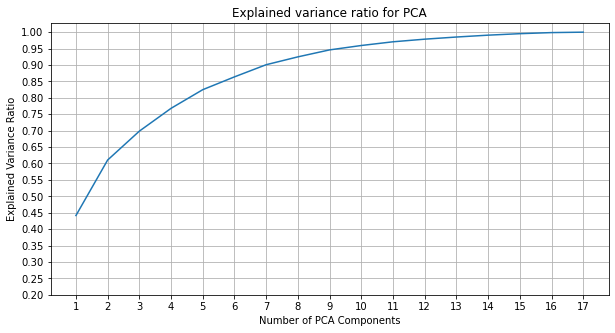

In [24]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(can_n_components, ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained variance ratio for PCA')
plt.yticks(np.arange(0.2, 1.05, .05))
plt.xticks(np.arange(1, 18, 1));

Let's choose 95% explained variance ratio, so n = 9

In [25]:
n = 9
pca_r = PCA(n_components=n, svd_solver='randomized', whiten=True).fit(faces_X_r_train)
faces_X_r_train_pca = pca_r.transform(faces_X_r_train)
faces_X_r_test_pca = pca_r.transform(faces_X_r_test)

#### Try SVM

On AU_r

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC

In [27]:
print("Searching the best parameters for SVC...")
param_grid = {
    "estimator__C": np.arange(10,100,20),
    "estimator__gamma": [0.0001, 0.0005, 0.001, 0.005, 0.0025, 0.01],
    "estimator__class_weight": [None, "balanced"],
    "estimator__decision_function_shape": ["ovo", "ovr"],
    "estimator__probability": [True, False]
}
svm_faces_aur_clf = GridSearchCV(
    MultiOutputClassifier(
        SVC()
    ), 
    param_grid, 
    verbose=1, 
    n_jobs=6
)
svm_faces_aur_clf = svm_faces_aur_clf.fit(faces_X_r_train_pca, faces_y_train)
print(f"Best parameters for SVC: {svm_faces_aur_clf.best_params_}")

Searching the best parameters for SVC...
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  46 tasks      | elapsed:    1.1s


Best parameters for SVC: {'estimator__C': 70, 'estimator__class_weight': None, 'estimator__decision_function_shape': 'ovo', 'estimator__gamma': 0.0005, 'estimator__probability': True}


[Parallel(n_jobs=6)]: Done 1200 out of 1200 | elapsed:    4.1s finished


In [28]:
svm_faces_aur_clf.best_estimator_.score(faces_X_r_test_pca, faces_y_test)

0.6309523809523809

In [29]:
dump(svm_faces_aur_clf, 'svm_faces_aur_clf.joblib')

['svm_faces_aur_clf.joblib']

On AU_c

In [30]:
can_n_components = range(1, 18, 1)
ratios = []
for n in can_n_components:
    pca = PCA(n_components=n)
    faces_X_c_pca = pca.fit_transform(faces_X_r)
    ratios.append(np.sum(pca.explained_variance_ratio_))

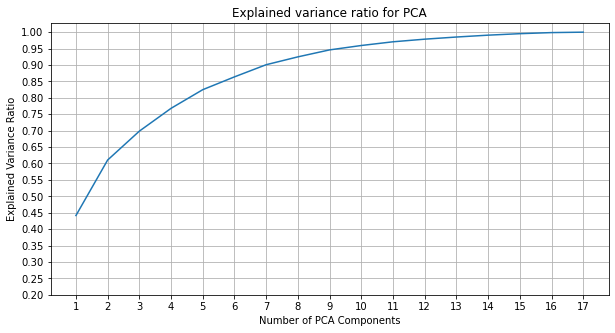

In [31]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(can_n_components, ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained variance ratio for PCA')
plt.yticks(np.arange(0.2, 1.05, .05))
plt.xticks(np.arange(1, 18, 1));

In [32]:
n = 11
pca_c = PCA(n_components=n, svd_solver='randomized', whiten=True).fit(faces_X_c_train)
faces_X_c_train_pca = pca_c.transform(faces_X_c_train)
faces_X_c_test_pca = pca_c.transform(faces_X_c_test)

In [33]:
print("Searching the best parameters for SVC...")
param_grid = {
    "estimator__C": np.arange(10,100,20),
    "estimator__gamma": [0.0001, 0.0005, 0.001, 0.005, 0.0025, 0.01],
    "estimator__class_weight": [None, "balanced"],
    "estimator__decision_function_shape": ["ovo", "ovr"],
    "estimator__probability": [True, False]
}
svm_faces_auc_clf = GridSearchCV(
    MultiOutputClassifier(
        SVC()
    ), 
    param_grid, 
    verbose=1, 
    n_jobs=6
)
svm_faces_auc_clf = svm_faces_auc_clf.fit(faces_X_c_train_pca, faces_y_train)
print(f"Best parameters for SVC: {svm_faces_auc_clf.best_params_}")

Searching the best parameters for SVC...
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.4s


Best parameters for SVC: {'estimator__C': 10, 'estimator__class_weight': None, 'estimator__decision_function_shape': 'ovo', 'estimator__gamma': 0.01, 'estimator__probability': True}


[Parallel(n_jobs=6)]: Done 1200 out of 1200 | elapsed:    3.5s finished


In [34]:
svm_faces_auc_clf.best_estimator_.score(faces_X_c_test_pca, faces_y_test)

0.5714285714285714

In [35]:
dump(svm_faces_auc_clf, 'svm_faces_auc_clf.joblib')

['svm_faces_auc_clf.joblib']

#### Try KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

On AU_r

In [51]:
print("Searching the best parameters for KNN...")
param_grid = {
    "estimator__n_neighbors": np.arange(1,15,1),
    "estimator__weights": ["uniform", "distance"],
    "estimator__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "estimator__leaf_size": np.arange(1,15,1),
    "estimator__p": [1, 2]
}
knn_faces_aur_clf = GridSearchCV(
    MultiOutputClassifier(
        KNeighborsClassifier()
    ), 
    param_grid, 
    verbose=1, 
    n_jobs=6
)
knn_faces_aur_clf = knn_faces_aur_clf.fit(faces_X_r_train_pca, faces_y_train)
print(f"Best parameters for SVC: {knn_faces_aur_clf.best_params_}")

Searching the best parameters for KNN...
Fitting 5 folds for each of 3136 candidates, totalling 15680 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  41 tasks      | elapsed:    1.9s
[Parallel(n_jobs=6)]: Done 1132 tasks      | elapsed:    5.8s
[Parallel(n_jobs=6)]: Done 3132 tasks      | elapsed:   12.0s
[Parallel(n_jobs=6)]: Done 5932 tasks      | elapsed:   21.1s
[Parallel(n_jobs=6)]: Done 9532 tasks      | elapsed:   32.3s
[Parallel(n_jobs=6)]: Done 13932 tasks      | elapsed:   45.9s


Best parameters for SVC: {'estimator__algorithm': 'auto', 'estimator__leaf_size': 1, 'estimator__n_neighbors': 13, 'estimator__p': 1, 'estimator__weights': 'uniform'}


[Parallel(n_jobs=6)]: Done 15669 out of 15680 | elapsed:   51.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 15680 out of 15680 | elapsed:   51.2s finished


In [52]:
knn_faces_aur_clf.best_estimator_.score(faces_X_r_test_pca, faces_y_test)

0.5

In [53]:
dump(knn_faces_aur_clf, 'knn_faces_aur_clf.joblib')

['knn_faces_aur_clf.joblib']

On AU_c

In [54]:
print("Searching the best parameters for KNN...")
param_grid = {
    "estimator__n_neighbors": np.arange(1,15,1),
    "estimator__weights": ["uniform", "distance"],
    "estimator__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "estimator__leaf_size": np.arange(1,15,1),
    "estimator__p": [1, 2]
}
knn_faces_auc_clf = GridSearchCV(
    MultiOutputClassifier(
        KNeighborsClassifier()
    ), 
    param_grid, 
    verbose=1, 
    n_jobs=6
)
knn_faces_auc_clf = knn_faces_auc_clf.fit(faces_X_c_train_pca, faces_y_train)
print(f"Best parameters for SVC: {knn_faces_auc_clf.best_params_}")

Searching the best parameters for KNN...
Fitting 5 folds for each of 3136 candidates, totalling 15680 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    5.0s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   11.1s
[Parallel(n_jobs=6)]: Done 6100 tasks      | elapsed:   19.4s
[Parallel(n_jobs=6)]: Done 9700 tasks      | elapsed:   30.5s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:   43.8s


Best parameters for SVC: {'estimator__algorithm': 'auto', 'estimator__leaf_size': 1, 'estimator__n_neighbors': 9, 'estimator__p': 1, 'estimator__weights': 'distance'}


[Parallel(n_jobs=6)]: Done 15680 out of 15680 | elapsed:   48.4s finished


In [55]:
knn_faces_auc_clf.best_estimator_.score(faces_X_c_test_pca, faces_y_test)

0.4166666666666667

In [56]:
dump(knn_faces_auc_clf, 'knn_faces_auc_clf.joblib')

['knn_faces_auc_clf.joblib']

Try boost KNN with scaler that uses AU_r data

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline

Best parameters for SVC: {'estimator__algorithm': 'auto', 'estimator__leaf_size': 1, 'estimator__n_neighbors': 1, 'estimator__p': 2, 'estimator__weights': 'uniform'}

In [58]:
names = [
    "Stander-KNN",
    "MinMax-KNN",
    "Robust-KNN"
]
scaler_knn_aur_clfs = [
    make_pipeline(
        StandardScaler(),
        KNeighborsClassifier(
            algorithm="auto",
            leaf_size=1,
            n_neighbors=13,
            p=2,
            weights="uniform"
        )
    ),
    make_pipeline(
        MinMaxScaler(),
        KNeighborsClassifier(
            algorithm="auto",
            leaf_size=1,
            n_neighbors=13,
            p=2,
            weights="uniform"
        )
    ),
    make_pipeline(
        RobustScaler(),
        KNeighborsClassifier(
            algorithm="auto",
            leaf_size=1,
            n_neighbors=13,
            p=2,
            weights="uniform"
        )
    )
]

In [59]:
scaler_knn_aur_clf_clc = {}
for name, clf in zip(names, scaler_knn_aur_clfs):
    clf = clf.fit(faces_X_r_train_pca, faces_y_train)
    score = clf.score(faces_X_r_test_pca, faces_y_test)
    scaler_knn_aur_clf_clc.update(
        {
            name:{
                "clf":clf,
                "score":score
            }
        }
    )
scaler_knn_aur_clf_clc

/home/liam/anaconda3/envs/py3.8.3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/liam/anaconda3/envs/py3.8.3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/liam/anaconda3/envs/py3.8.3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


{'Stander-KNN': {'clf': Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('kneighborsclassifier',
                   KNeighborsClassifier(leaf_size=1, n_neighbors=13))]),
  'score': 0.5357142857142857},
 'MinMax-KNN': {'clf': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                  ('kneighborsclassifier',
                   KNeighborsClassifier(leaf_size=1, n_neighbors=13))]),
  'score': 0.4880952380952381},
 'Robust-KNN': {'clf': Pipeline(steps=[('robustscaler', RobustScaler()),
                  ('kneighborsclassifier',
                   KNeighborsClassifier(leaf_size=1, n_neighbors=13))]),
  'score': 0.5238095238095238}}

This is not really helping...

#### Try MLP
Ref: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [60]:
faces_X_r_train.shape

(168, 17)

In [61]:
faces_y_train

,emotion
129,fear
96,joy
7,anger
185,neutral frontal
173,sadness
...,...
91,anger
191,fear
180,joy
42,joy


Nh=Ns(α∗(Ni+No))

- Ni = number of input neurons.
- No = number of output neurons.
- Ns = number of samples in training data set.
- α = an arbitrary scaling factor usually 2-10.

168*(2*(17+7)) = 8064
8064/4 = 2016

In [62]:
from sklearn.neural_network import MLPClassifier

In [ ]:
print("Searching the best parameters for MLP...")
param_grid = {
    "estimator__activation": ["identity", "logistic", "tanh", "relu"],
    "estimator__solver": ["lbfgs", "sgd", "adam"],
    "estimator__alpha": np.arange(0.00001,0.001,0.0005),
    "estimator__beta_1": np.arange(0.1,0.9,0.8),
    "estimator__beta_2": np.arange(0.1,0.9,0.8),
    "estimator__hidden_layer_sizes": [(2016,2016,2016,2016)],
    "estimator__learning_rate": ["constant", "invscaling", "adaptive"]
}
mlp_faces_aur_clf = GridSearchCV(
    MultiOutputClassifier(
        MLPClassifier()
    ), 
    param_grid, 
    verbose=1, 
    n_jobs=6
)
mlp_faces_aur_clf = mlp_faces_aur_clf.fit(faces_X_r_train_pca, faces_y_train)
print(f"Best parameters for SVC: {mlp_faces_aur_clf.best_params_}")

Searching the best parameters for MLP...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


In [ ]:
mlp_faces_aur_clf.best_estimator_.score(faces_X_r_test_pca, faces_y_test)

In [ ]:
dump(mlp_faces_aur_clf, 'mlp_faces_aur_clf.joblib')

In [ ]:
print("Searching the best parameters for MLP...")
param_grid = {
    "estimator__activation": ["identity", "logistic", "tanh", "relu"],
    "estimator__alpha": np.arange(0.0000001,0.001,0.0002),
    "estimator__beta_1": np.arange(0,0.9,0.1),
    "estimator__beta_2": np.arange(0,0.9,0.1),
    "estimator__hidden_layer_sizes": [(2016,2016,2016,2016)],
    "estimator__learning_rate": ["constant", "invscaling", "adaptive"]
}
mlp_faces_auc_clf = GridSearchCV(
    MultiOutputClassifier(
        MLPClassifier()
    ), 
    param_grid, 
    verbose=1, 
    n_jobs=6
)
mlp_faces_auc_clf = mlp_faces_auc_clf.fit(faces_X_c_train_pca, faces_y_train)
print(f"Best parameters for SVC: {mlp_faces_aur_clf.best_params_}")

In [ ]:
mlp_faces_auc_clf.best_estimator_.score(faces_X_c_test_pca, faces_y_test)

In [ ]:
dump(mlp_faces_auc_clf, 'mlp_faces_auc_clf.joblib')